In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
import matplotlib.pyplot
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


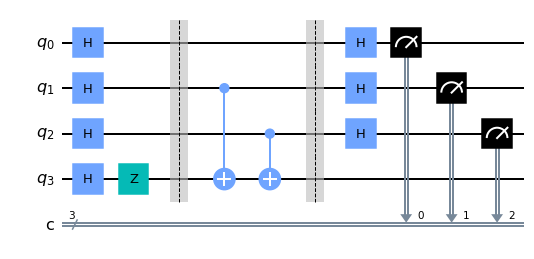

In [2]:
#buildig the initial circuit

s = '110'
n = len(s)

circuit_bv = QuantumCircuit(n+1, n)
circuit_bv.h(arange(n+1))
circuit_bv.z(n)
circuit_bv.barrier()


#Building the oracle
for i in range(n):
    if s[n-i-1] == "1":
        circuit_bv.cx(i, n)
circuit_bv.barrier()


#constructing the final part of the circuit
circuit_bv.h(arange(n))
circuit_bv.measure(arange(0,n), arange(0,n))
circuit_bv.draw('mpl')

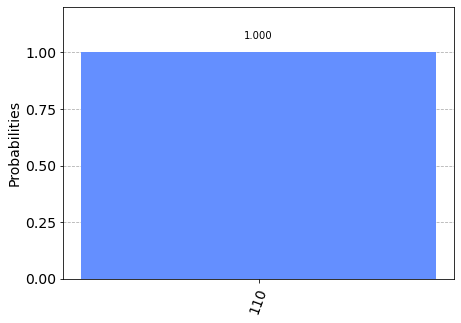

In [3]:
# use qasm simulator
qasm_sim = Aer.get_backend('qasm_simulator')

#set no of shots
shots = 1

#assemble quantum circuit
qobj = assemble(circuit_bv, qasm_sim)

#run the circuit on the simulator
results = qasm_sim.run(qobj).result()

#get counts
answer = results.get_counts()

plot_histogram(answer)

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2021-04-18 13:34:47,133: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmqx2


In [7]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_bv_circuit = transpile(circuit_bv, backend)
qobj = assemble(transpiled_bv_circuit, shots=shots)
job = backend.run(qobj)

job_monitor(job, interval=2)

<ipython-input-7-a6ac748bd17e>:7: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


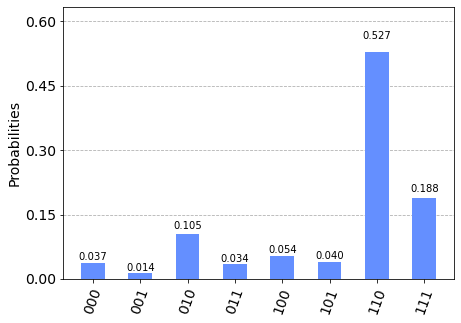

In [8]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)